In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from seaborn import heatmap
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
categorical = ["cut","color","clarity"]
continuous = ["carat","depth","table","x","y","z"]
target = ["price"]

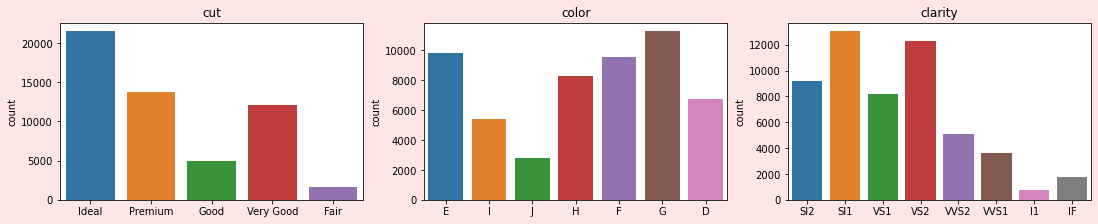

In [10]:
fig = plt.figure(figsize=(25,15))
fig.patch.set_facecolor("#ffe6e6")
for i, c in enumerate(categorical):
    plt.subplot(4,4,i+1)
    sns.countplot(df[c])
    plt.title(c)
    plt.xlabel("")

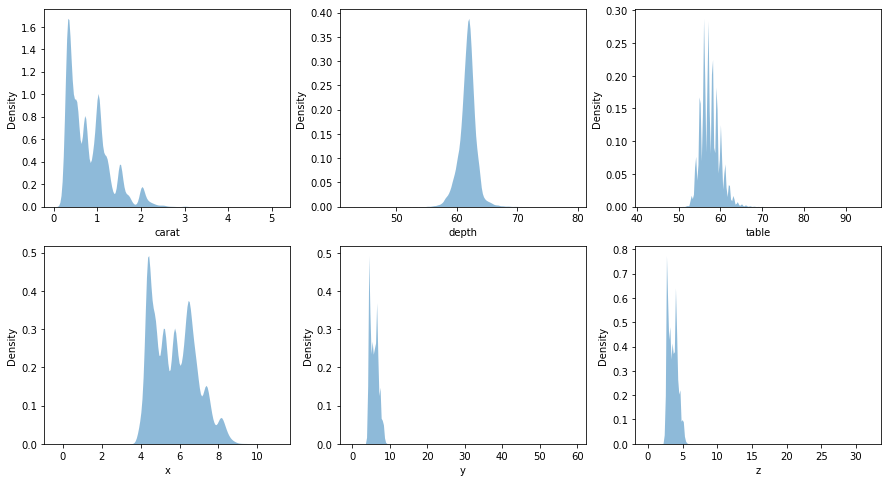

In [11]:
plt.figure(figsize=(15,8))
for i, c in enumerate(continuous):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=df, x=df[c], fill=True,palette=["blue","red"], alpha=.5, linewidth=0)

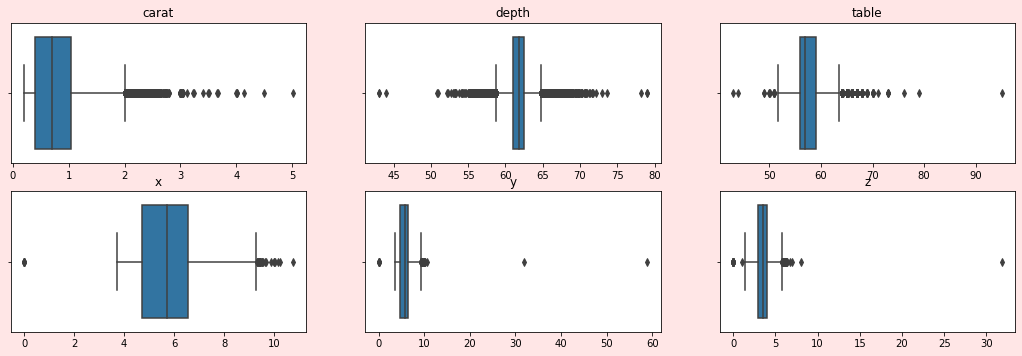

In [12]:
fig = plt.figure(figsize=(18,15))
fig.patch.set_facecolor("#ffe6e6")
for i, c in enumerate(continuous):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df[c])
    plt.title(c)
    plt.xlabel("")

In [13]:
Q1_carat = df.carat.quantile(0.25)
Q3_carat = df.carat.quantile(0.75)
IQR_carat = Q3_carat - Q1_carat
IQR_carat

0.64

In [14]:
carat_ust_sinir = Q3_carat + 1.5 * IQR_carat
carat_alt_sinir = Q1_carat - 1.5 * IQR_carat
print("carat Alt Sınır" , carat_alt_sinir)
print("carat Üst Sınır", carat_ust_sinir)

carat Alt Sınır -0.5599999999999999
carat Üst Sınır 2.0


In [15]:
df.drop(df[(df.carat > carat_ust_sinir) & df.price].index, inplace=True)
df.drop(df[(df.carat < carat_alt_sinir) & df.price].index, inplace=True)
df.shape

(52986, 10)

In [16]:
Q1_depth = df.depth.quantile(0.25)
Q3_depth = df.depth.quantile(0.75)
IQR_depth = Q3_depth - Q1_depth
IQR_depth

1.5

In [17]:
depth_ust_sinir = Q3_depth + 1.5 * IQR_depth
depth_alt_sinir = Q1_depth - 1.5 * IQR_depth
print("depth Alt Sınır" , depth_alt_sinir)
print("depth Üst Sınır", depth_ust_sinir)

depth Alt Sınır 58.75
depth Üst Sınır 64.75


In [18]:
df.drop(df[(df.depth > depth_ust_sinir) & df.price].index, inplace=True)
df.drop(df[(df.depth < depth_alt_sinir) & df.price].index, inplace=True)
df.shape

(51887, 10)

In [19]:
Q1_table = df.table.quantile(0.25)
Q3_table = df.table.quantile(0.75)
IQR_table = Q3_table - Q1_table
IQR_table

3.0

In [20]:
table_ust_sinir = Q3_table + 1.5 * IQR_table
table_alt_sinir = Q1_table - 1.5 * IQR_table
print("table Alt Sınır" , table_alt_sinir)
print("table Üst Sınır", table_ust_sinir)

table Alt Sınır 51.5
table Üst Sınır 63.5


In [21]:
df.drop(df[(df.table > table_ust_sinir) & df.price].index, inplace=True)
df.drop(df[(df.table < table_alt_sinir) & df.price].index, inplace=True)
df.shape

(51723, 10)

In [22]:
Q1_x = df.x.quantile(0.25)
Q3_x = df.x.quantile(0.75)
IQR_x = Q3_x - Q1_x
IQR_x

1.8199999999999994

In [23]:
x_ust_sinir = Q3_x + 1.5 * IQR_x
x_alt_sinir = Q1_x - 1.5 * IQR_x
print("x Alt Sınır" , x_alt_sinir)
print("x Üst Sınır", x_ust_sinir)

x Alt Sınır 1.9600000000000013
x Üst Sınır 9.239999999999998


In [24]:
df.drop(df[(df.x > x_ust_sinir) & df.price].index, inplace=True)
df.drop(df[(df.x < x_alt_sinir) & df.price].index, inplace=True)
df.shape

(51722, 10)

In [25]:
Q1_y = df.y.quantile(0.25)
Q3_y = df.y.quantile(0.75)
IQR_y = Q3_y - Q1_y
IQR_y

1.7999999999999998

In [26]:
y_ust_sinir = Q3_y + 1.5 * IQR_y
y_alt_sinir = Q1_y - 1.5 * IQR_y
print("y Alt Sınır" , y_alt_sinir)
print("y Üst Sınır", y_ust_sinir)

y Alt Sınır 2.0000000000000004
y Üst Sınır 9.2


In [27]:
df.drop(df[(df.y > y_ust_sinir) & df.price].index, inplace=True)
df.drop(df[(df.y < y_alt_sinir) & df.price].index, inplace=True)
df.shape

(51721, 10)

In [28]:
Q1_z = df.z.quantile(0.25)
Q3_z = df.z.quantile(0.75)
IQR_z = Q3_z - Q1_z
IQR_z

1.1299999999999994

In [29]:
z_ust_sinir = Q3_z + 1.5 * IQR_z
z_alt_sinir = Q1_z - 1.5 * IQR_z
print("z Alt Sınır" , z_alt_sinir)
print("z Üst Sınır", z_ust_sinir)

z Alt Sınır 1.195000000000001
z Üst Sınır 5.714999999999999


In [30]:
df.drop(df[(df.z > z_ust_sinir) & df.price].index, inplace=True)
df.drop(df[(df.z < z_alt_sinir) & df.price].index, inplace=True)
df.shape

(51717, 10)

<AxesSubplot:>

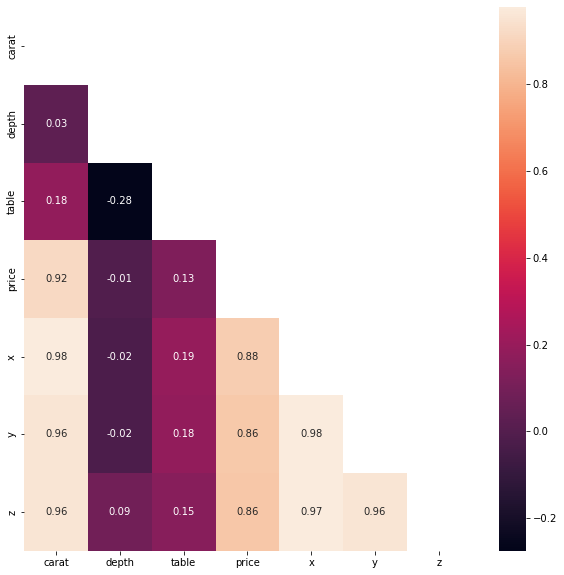

In [31]:
corr=df.corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,mask=mask,fmt=".2f",annot=True)

In [32]:
df.drop("depth", axis=1, inplace=True)
df.drop("table", axis=1, inplace=True)

In [33]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48


In [34]:
df.describe()

,carat,price,x,y,z
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.770921,3734.009629,5.677067,5.681222,3.507370
std,0.441660,3734.323503,1.079870,1.097645,0.679878
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.390000,930.000000,4.690000,4.700000,2.890000
50%,0.700000,2327.000000,5.670000,5.670000,3.500000
75%,1.030000,5151.000000,6.510000,6.500000,4.020000
max,5.010000,18818.000000,10.740000,58.900000,31.800000


In [35]:
for i in df[categorical]:
    for j,c in enumerate(df[i].unique()):
        df[i] = df[i].replace(c,j)

In [36]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,0,0,0,326,3.95,3.98,2.43
1,0.21,1,0,1,326,3.89,3.84,2.31
3,0.29,1,1,2,334,4.20,4.23,2.63
4,0.31,2,2,0,335,4.34,4.35,2.75
5,0.24,3,2,3,336,3.94,3.96,2.48


In [37]:
x = df.drop("price",axis=1)
y = df["price"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

In [38]:
sts = StandardScaler()
scale = sts.fit(x_train)

In [39]:
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [41]:
lm.fit(x_train,y_train)

LinearRegression()

In [42]:
lm.score(x_test,y_test)

0.8681659220171394

In [43]:
lm.score(x_train,y_train)

0.8659327633899523

In [44]:
pred = lm.predict(x_test)
pred

array([5280.51795909, 8078.16612662, 5303.39796058, ..., 2807.10769813,
       1156.86289284, -472.2752898 ])